In [17]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("train_2.csv")

In [19]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [20]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [21]:
df.store.unique()
df.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [22]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [27]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [24]:
df['date'] = pd.to_datetime(df.date)

In [25]:
df1 = df.drop('store',axis = 1)

In [26]:
df1.groupby(df1['date'].dt.month)['sales'].sum()

date
1     2753149
2     2776177
3     3666182
4     4136467
5     4582437
6     4726911
7     5192393
8     4580655
9     4130457
10    3967520
11    4141356
12    3050808
Name: sales, dtype: int64

In [28]:
# Finding data period
df1['date'].dt.to_period('Y').unique()

<PeriodArray>
['2013', '2014', '2015', '2016', '2017']
Length: 5, dtype: period[A-DEC]

In [35]:
# Creation of date intervals for data generation
s_date = []
e_date = []

for y in [2013,2014,2015,2016,2017]:
    for j in [3,4,5]:
        for i in range(1,30):
            s_date.append(f'{y}-{j}-{i}')
            e_date.append(f'{y}-{j+3}-{i}')

In [38]:
# Creating a aggregate data set from the source data

for i in range(len(s_date)):
    start_date = s_date[i]
    end_date = e_date[i]
    df2 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]
    df3 = df2.groupby([pd.Grouper(key ='date', freq ='y'),'item']).sum()
    df3.reset_index(inplace=True)
    if i == 0:
        df_ml = pd.DataFrame({'start_date':start_date,'end_date':end_date,'item':df3.item,'sales':df3.sales})
    else:
        df_ml1 = pd.DataFrame({'start_date':start_date,'end_date':end_date,'item':df3.item,'sales':df3.sales})
        df_ml = pd.concat([df_ml,df_ml1])

In [39]:
df_ml

,start_date,end_date,item,sales
0,2013-3-1,2013-6-1,1,17534
1,2013-3-1,2013-6-1,2,46695
2,2013-3-1,2013-6-1,3,29408
3,2013-3-1,2013-6-1,4,17775
4,2013-3-1,2013-6-1,5,14639
...,...,...,...,...
45,2017-5-29,2017-8-29,46,73686
46,2017-5-29,2017-8-29,47,27981
47,2017-5-29,2017-8-29,48,64320
48,2017-5-29,2017-8-29,49,36979


In [40]:
df_ml['start_date'] = pd.to_datetime(df_ml.start_date)
df_ml['end_date'] = pd.to_datetime(df_ml.end_date)
df_ml
df_ml.dtypes

start_date    datetime64[ns]
end_date      datetime64[ns]
item                   int64
sales                  int64
dtype: object

In [41]:
# Feature extraction

df_ml['month'] = df_ml['start_date'].dt.month
df_ml['year'] = df_ml['start_date'].dt.year
df_ml['quarter'] = df_ml['start_date'].dt.quarter
df_ml['day'] = df_ml['start_date'].dt.day
df_ml['dayofweek'] = df_ml['start_date'].dt.dayofweek

In [42]:
# Weekends between dates
def count_weekends(start_date, end_date):
    weekend_count = 0
    delta = dt.timedelta(days=1)
    current_date = start_date
    while current_date <= end_date:
        if current_date.weekday() == 5 or current_date.weekday() == 6: # Saturday is 5 and Sunday is 6
            weekend_count += 1
        current_date += delta
    return weekend_count

weekend = []
for i in range(len(df_ml.start_date)):
    start_date = df_ml.iloc[i,0]
    end_date = df_ml.iloc[i,1]
    weekend.append(count_weekends(start_date, end_date))
    
df_ml['no_of_weekends'] = weekend

In [43]:
print(df_ml.isna().sum())
df_ml.describe()
print(df_ml.shape)
df_ml = df_ml.drop_duplicates()
print(df_ml.shape)

start_date        0
end_date          0
item              0
sales             0
month             0
year              0
quarter           0
day               0
dayofweek         0
no_of_weekends    0
dtype: int64
(21750, 10)
(21750, 10)


In [44]:
df_ml[['sales','no_of_weekends','day','year','dayofweek']].corr()

,sales,no_of_weekends,day,year,dayofweek
sales,1.000000,-0.000325,3.249861e-02,2.356072e-01,0.003774
no_of_weekends,-0.000325,1.000000,-4.152052e-03,-2.456387e-03,0.754260
day,0.032499,-0.004152,1.000000e+00,1.318046e-14,-0.003849
year,0.235607,-0.002456,1.318046e-14,1.000000e+00,0.003253
dayofweek,0.003774,0.754260,-3.848925e-03,3.252936e-03,1.000000


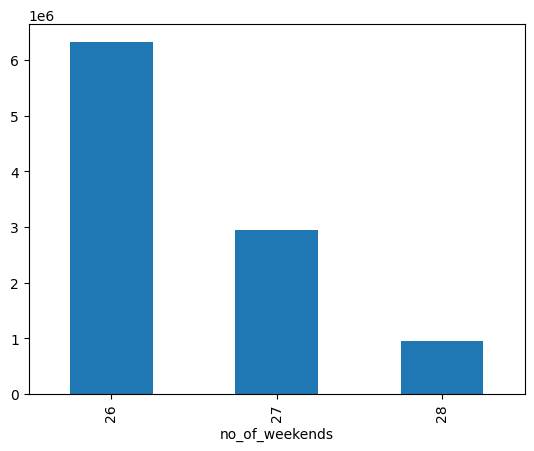

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
0 2013-03-01 2013-06-01     1  17534      3  2013        1    1          4   
0 2013-03-02 2013-06-02     1  17644      3  2013        1    2          5   
0 2013-03-03 2013-06-03     1  17617      3  2013        1    3          6   
0 2013-03-04 2013-06-04     1  17627      3  2013        1    4          0   
0 2013-03-05 2013-06-05     1  17689      3  2013        1    5          1   

   no_of_weekends  
0              27  
0              28  
0              27  
0              26  
0              26  


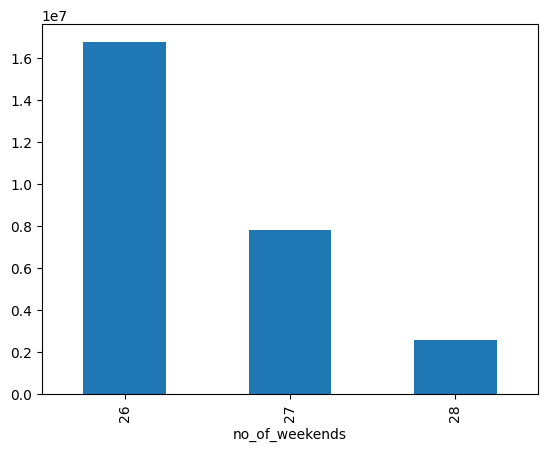

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
1 2013-03-01 2013-06-01     2  46695      3  2013        1    1          4   
1 2013-03-02 2013-06-02     2  46923      3  2013        1    2          5   
1 2013-03-03 2013-06-03     2  46887      3  2013        1    3          6   
1 2013-03-04 2013-06-04     2  46939      3  2013        1    4          0   
1 2013-03-05 2013-06-05     2  47131      3  2013        1    5          1   

   no_of_weekends  
1              27  
1              28  
1              27  
1              26  
1              26  


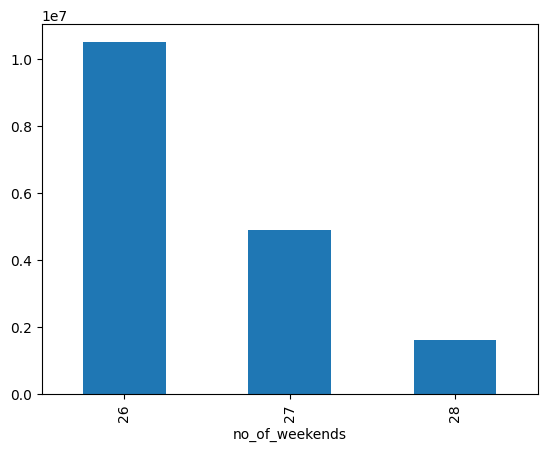

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
2 2013-03-01 2013-06-01     3  29408      3  2013        1    1          4   
2 2013-03-02 2013-06-02     3  29581      3  2013        1    2          5   
2 2013-03-03 2013-06-03     3  29552      3  2013        1    3          6   
2 2013-03-04 2013-06-04     3  29535      3  2013        1    4          0   
2 2013-03-05 2013-06-05     3  29653      3  2013        1    5          1   

   no_of_weekends  
2              27  
2              28  
2              27  
2              26  
2              26  


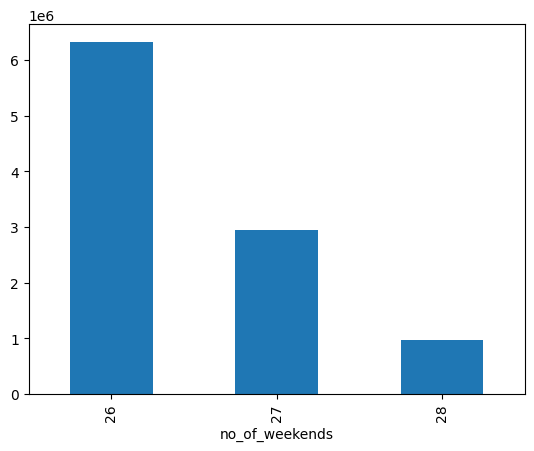

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
3 2013-03-01 2013-06-01     4  17775      3  2013        1    1          4   
3 2013-03-02 2013-06-02     4  17848      3  2013        1    2          5   
3 2013-03-03 2013-06-03     4  17826      3  2013        1    3          6   
3 2013-03-04 2013-06-04     4  17842      3  2013        1    4          0   
3 2013-03-05 2013-06-05     4  17923      3  2013        1    5          1   

   no_of_weekends  
3              27  
3              28  
3              27  
3              26  
3              26  


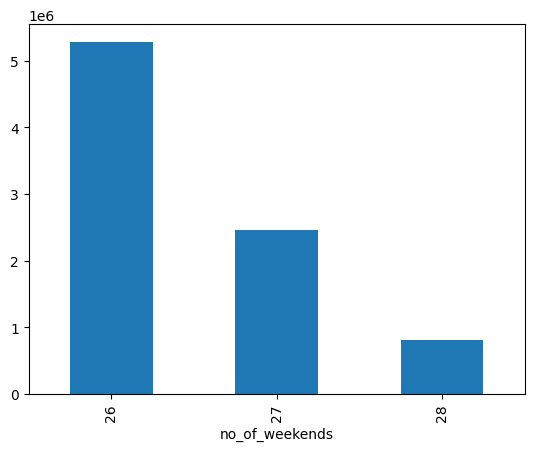

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
4 2013-03-01 2013-06-01     5  14639      3  2013        1    1          4   
4 2013-03-02 2013-06-02     5  14748      3  2013        1    2          5   
4 2013-03-03 2013-06-03     5  14718      3  2013        1    3          6   
4 2013-03-04 2013-06-04     5  14730      3  2013        1    4          0   
4 2013-03-05 2013-06-05     5  14811      3  2013        1    5          1   

   no_of_weekends  
4              27  
4              28  
4              27  
4              26  
4              26  


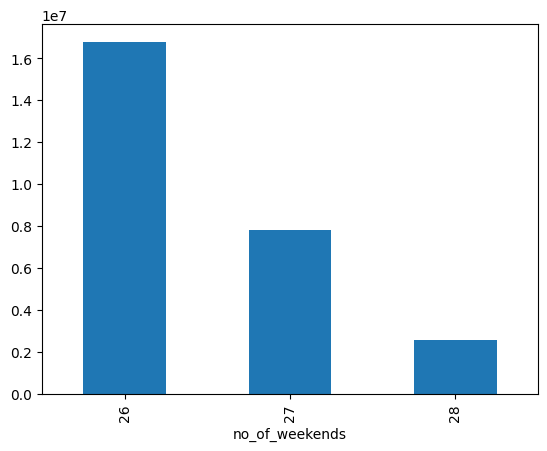

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
5 2013-03-01 2013-06-01     6  46708      3  2013        1    1          4   
5 2013-03-02 2013-06-02     6  46986      3  2013        1    2          5   
5 2013-03-03 2013-06-03     6  46957      3  2013        1    3          6   
5 2013-03-04 2013-06-04     6  46992      3  2013        1    4          0   
5 2013-03-05 2013-06-05     6  47184      3  2013        1    5          1   

   no_of_weekends  
5              27  
5              28  
5              27  
5              26  
5              26  


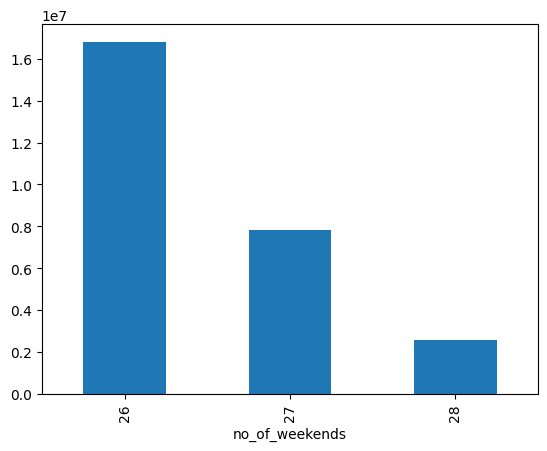

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
6 2013-03-01 2013-06-01     7  47222      3  2013        1    1          4   
6 2013-03-02 2013-06-02     7  47495      3  2013        1    2          5   
6 2013-03-03 2013-06-03     7  47449      3  2013        1    3          6   
6 2013-03-04 2013-06-04     7  47415      3  2013        1    4          0   
6 2013-03-05 2013-06-05     7  47602      3  2013        1    5          1   

   no_of_weekends  
6              27  
6              28  
6              27  
6              26  
6              26  


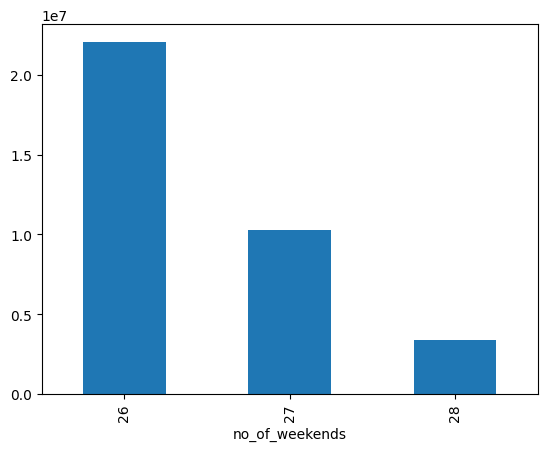

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
7 2013-03-01 2013-06-01     8  61579      3  2013        1    1          4   
7 2013-03-02 2013-06-02     8  61894      3  2013        1    2          5   
7 2013-03-03 2013-06-03     8  61851      3  2013        1    3          6   
7 2013-03-04 2013-06-04     8  61813      3  2013        1    4          0   
7 2013-03-05 2013-06-05     8  62074      3  2013        1    5          1   

   no_of_weekends  
7              27  
7              28  
7              27  
7              26  
7              26  


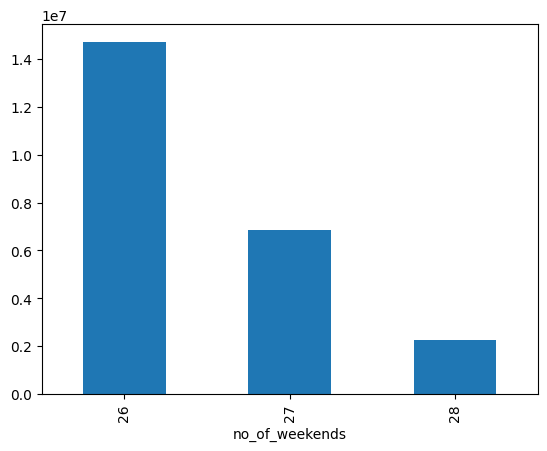

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
8 2013-03-01 2013-06-01     9  41246      3  2013        1    1          4   
8 2013-03-02 2013-06-02     9  41405      3  2013        1    2          5   
8 2013-03-03 2013-06-03     9  41450      3  2013        1    3          6   
8 2013-03-04 2013-06-04     9  41439      3  2013        1    4          0   
8 2013-03-05 2013-06-05     9  41604      3  2013        1    5          1   

   no_of_weekends  
8              27  
8              28  
8              27  
8              26  
8              26  


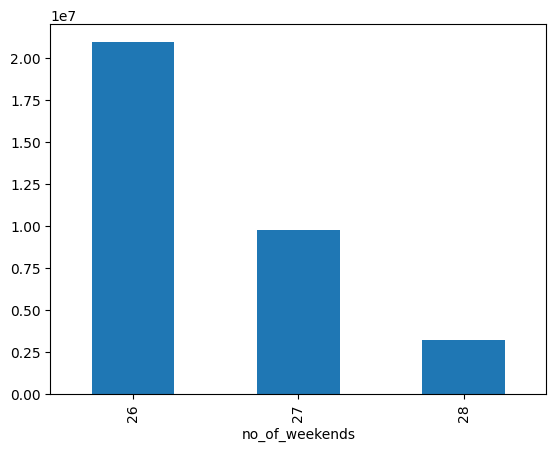

  start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
9 2013-03-01 2013-06-01    10  58406      3  2013        1    1          4   
9 2013-03-02 2013-06-02    10  58648      3  2013        1    2          5   
9 2013-03-03 2013-06-03    10  58648      3  2013        1    3          6   
9 2013-03-04 2013-06-04    10  58661      3  2013        1    4          0   
9 2013-03-05 2013-06-05    10  58885      3  2013        1    5          1   

   no_of_weekends  
9              27  
9              28  
9              27  
9              26  
9              26  


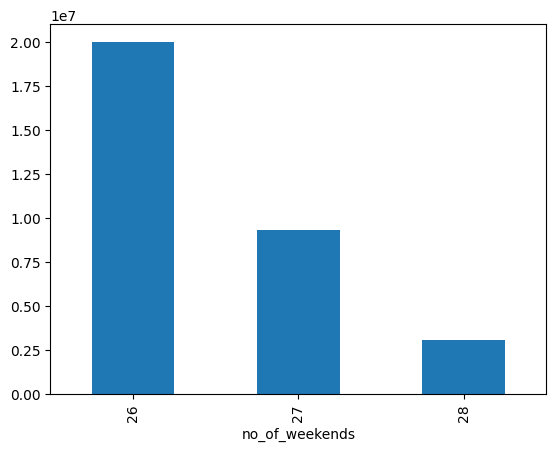

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
10 2013-03-01 2013-06-01    11  55863      3  2013        1    1          4   
10 2013-03-02 2013-06-02    11  56140      3  2013        1    2          5   
10 2013-03-03 2013-06-03    11  56068      3  2013        1    3          6   
10 2013-03-04 2013-06-04    11  56091      3  2013        1    4          0   
10 2013-03-05 2013-06-05    11  56313      3  2013        1    5          1   

    no_of_weekends  
10              27  
10              28  
10              27  
10              26  
10              26  


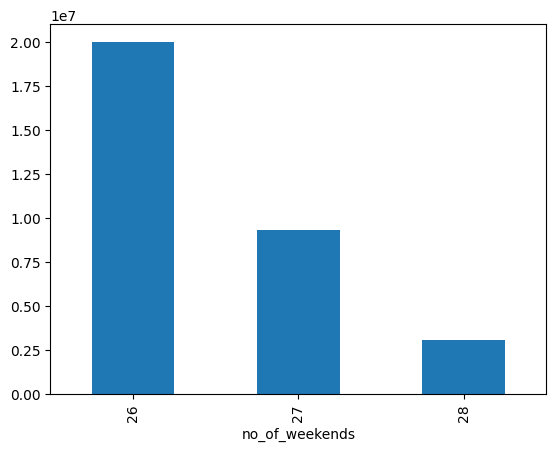

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
11 2013-03-01 2013-06-01    12  55667      3  2013        1    1          4   
11 2013-03-02 2013-06-02    12  55963      3  2013        1    2          5   
11 2013-03-03 2013-06-03    12  55904      3  2013        1    3          6   
11 2013-03-04 2013-06-04    12  55921      3  2013        1    4          0   
11 2013-03-05 2013-06-05    12  56115      3  2013        1    5          1   

    no_of_weekends  
11              27  
11              28  
11              27  
11              26  
11              26  


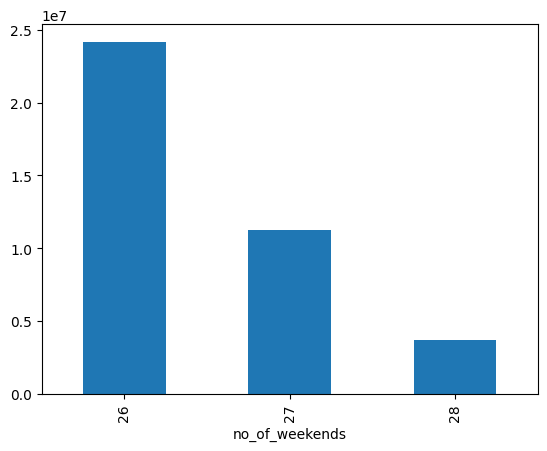

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
12 2013-03-01 2013-06-01    13  67390      3  2013        1    1          4   
12 2013-03-02 2013-06-02    13  67782      3  2013        1    2          5   
12 2013-03-03 2013-06-03    13  67760      3  2013        1    3          6   
12 2013-03-04 2013-06-04    13  67837      3  2013        1    4          0   
12 2013-03-05 2013-06-05    13  68110      3  2013        1    5          1   

    no_of_weekends  
12              27  
12              28  
12              27  
12              26  
12              26  


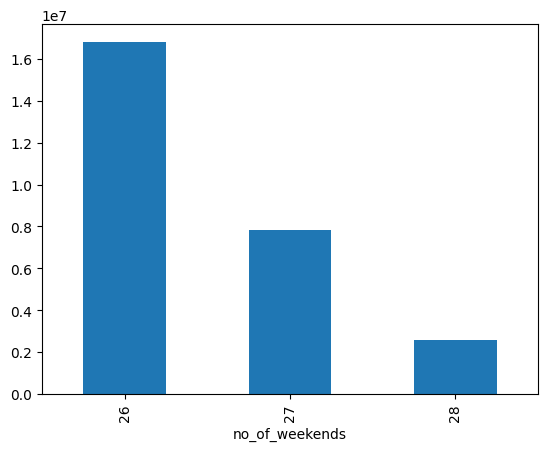

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
13 2013-03-01 2013-06-01    14  46847      3  2013        1    1          4   
13 2013-03-02 2013-06-02    14  47123      3  2013        1    2          5   
13 2013-03-03 2013-06-03    14  47090      3  2013        1    3          6   
13 2013-03-04 2013-06-04    14  47121      3  2013        1    4          0   
13 2013-03-05 2013-06-05    14  47292      3  2013        1    5          1   

    no_of_weekends  
13              27  
13              28  
13              27  
13              26  
13              26  


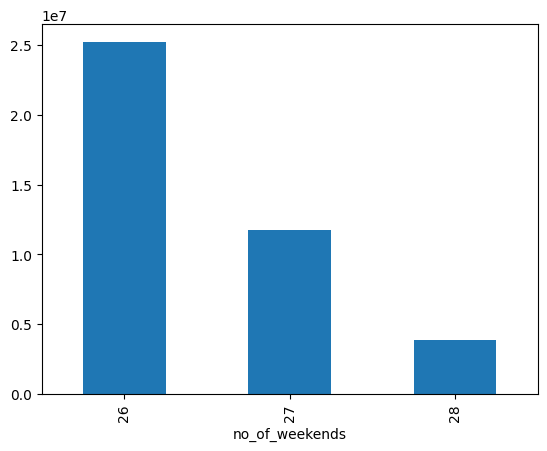

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
14 2013-03-01 2013-06-01    15  70302      3  2013        1    1          4   
14 2013-03-02 2013-06-02    15  70684      3  2013        1    2          5   
14 2013-03-03 2013-06-03    15  70626      3  2013        1    3          6   
14 2013-03-04 2013-06-04    15  70631      3  2013        1    4          0   
14 2013-03-05 2013-06-05    15  70911      3  2013        1    5          1   

    no_of_weekends  
14              27  
14              28  
14              27  
14              26  
14              26  


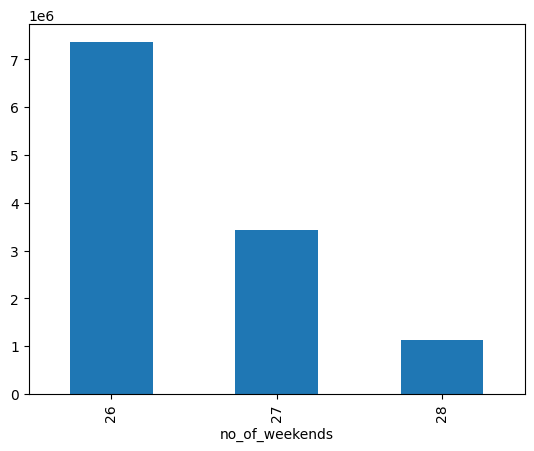

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
15 2013-03-01 2013-06-01    16  20788      3  2013        1    1          4   
15 2013-03-02 2013-06-02    16  20898      3  2013        1    2          5   
15 2013-03-03 2013-06-03    16  20900      3  2013        1    3          6   
15 2013-03-04 2013-06-04    16  20894      3  2013        1    4          0   
15 2013-03-05 2013-06-05    16  20964      3  2013        1    5          1   

    no_of_weekends  
15              27  
15              28  
15              27  
15              26  
15              26  


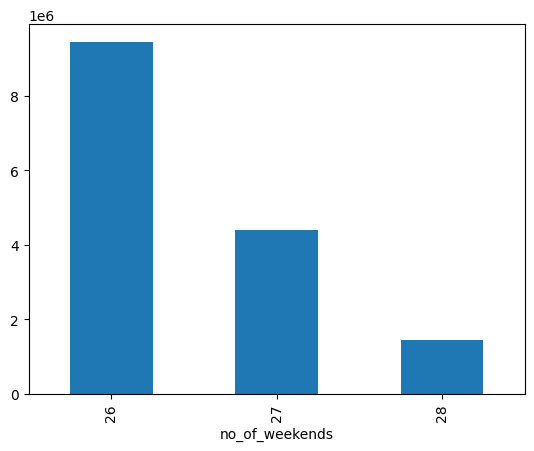

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
16 2013-03-01 2013-06-01    17  26634      3  2013        1    1          4   
16 2013-03-02 2013-06-02    17  26755      3  2013        1    2          5   
16 2013-03-03 2013-06-03    17  26762      3  2013        1    3          6   
16 2013-03-04 2013-06-04    17  26774      3  2013        1    4          0   
16 2013-03-05 2013-06-05    17  26926      3  2013        1    5          1   

    no_of_weekends  
16              27  
16              28  
16              27  
16              26  
16              26  


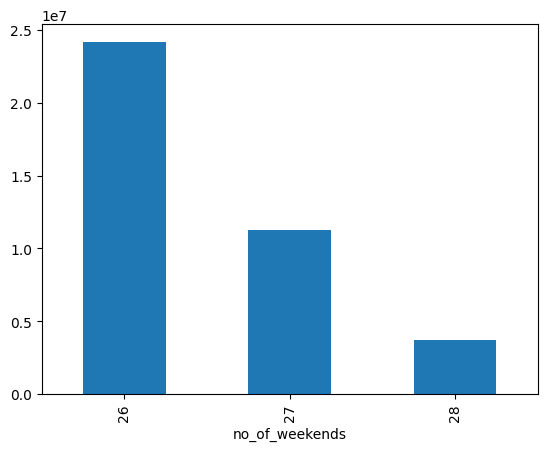

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
17 2013-03-01 2013-06-01    18  68061      3  2013        1    1          4   
17 2013-03-02 2013-06-02    18  68327      3  2013        1    2          5   
17 2013-03-03 2013-06-03    18  68279      3  2013        1    3          6   
17 2013-03-04 2013-06-04    18  68325      3  2013        1    4          0   
17 2013-03-05 2013-06-05    18  68621      3  2013        1    5          1   

    no_of_weekends  
17              27  
17              28  
17              27  
17              26  
17              26  


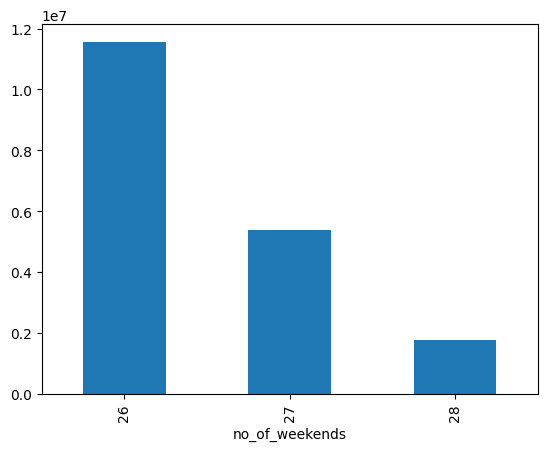

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
18 2013-03-01 2013-06-01    19  31895      3  2013        1    1          4   
18 2013-03-02 2013-06-02    19  32007      3  2013        1    2          5   
18 2013-03-03 2013-06-03    19  32021      3  2013        1    3          6   
18 2013-03-04 2013-06-04    19  32017      3  2013        1    4          0   
18 2013-03-05 2013-06-05    19  32108      3  2013        1    5          1   

    no_of_weekends  
18              27  
18              28  
18              27  
18              26  
18              26  


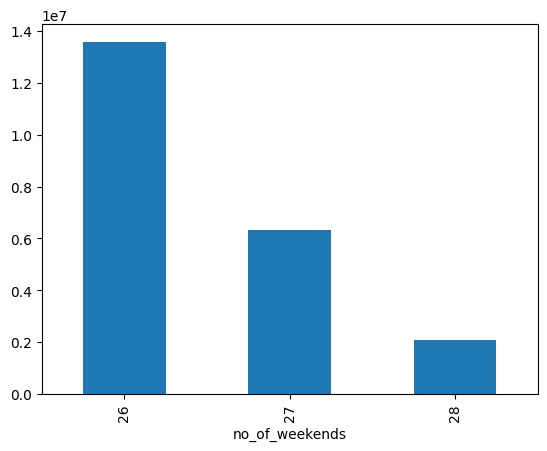

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
19 2013-03-01 2013-06-01    20  37972      3  2013        1    1          4   
19 2013-03-02 2013-06-02    20  38167      3  2013        1    2          5   
19 2013-03-03 2013-06-03    20  38133      3  2013        1    3          6   
19 2013-03-04 2013-06-04    20  38118      3  2013        1    4          0   
19 2013-03-05 2013-06-05    20  38269      3  2013        1    5          1   

    no_of_weekends  
19              27  
19              28  
19              27  
19              26  
19              26  


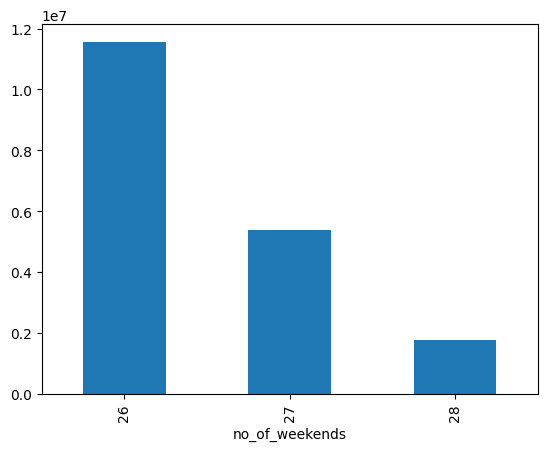

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
20 2013-03-01 2013-06-01    21  32206      3  2013        1    1          4   
20 2013-03-02 2013-06-02    21  32332      3  2013        1    2          5   
20 2013-03-03 2013-06-03    21  32388      3  2013        1    3          6   
20 2013-03-04 2013-06-04    21  32418      3  2013        1    4          0   
20 2013-03-05 2013-06-05    21  32573      3  2013        1    5          1   

    no_of_weekends  
20              27  
20              28  
20              27  
20              26  
20              26  


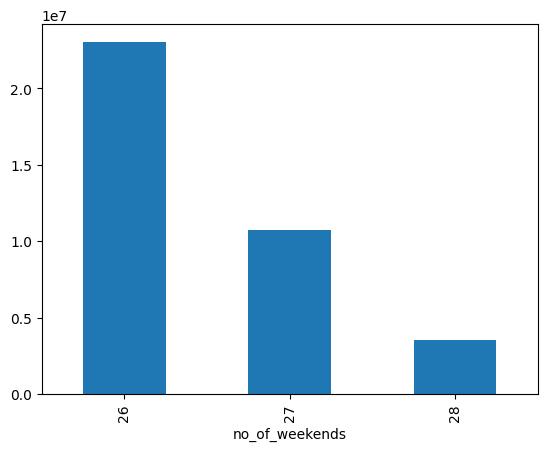

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
21 2013-03-01 2013-06-01    22  64814      3  2013        1    1          4   
21 2013-03-02 2013-06-02    22  65121      3  2013        1    2          5   
21 2013-03-03 2013-06-03    22  65019      3  2013        1    3          6   
21 2013-03-04 2013-06-04    22  65048      3  2013        1    4          0   
21 2013-03-05 2013-06-05    22  65316      3  2013        1    5          1   

    no_of_weekends  
21              27  
21              28  
21              27  
21              26  
21              26  


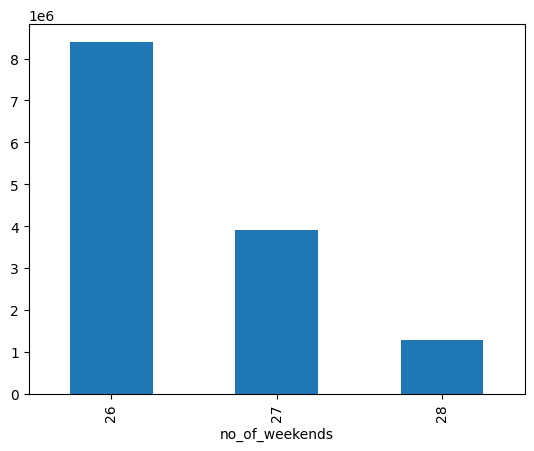

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
22 2013-03-01 2013-06-01    23  23297      3  2013        1    1          4   
22 2013-03-02 2013-06-02    23  23416      3  2013        1    2          5   
22 2013-03-03 2013-06-03    23  23442      3  2013        1    3          6   
22 2013-03-04 2013-06-04    23  23411      3  2013        1    4          0   
22 2013-03-05 2013-06-05    23  23492      3  2013        1    5          1   

    no_of_weekends  
22              27  
22              28  
22              27  
22              26  
22              26  


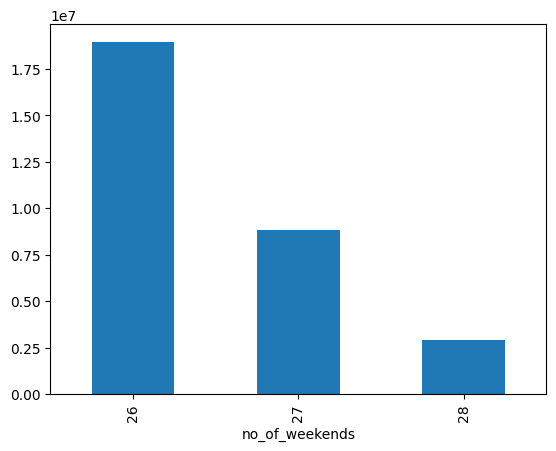

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
23 2013-03-01 2013-06-01    24  53189      3  2013        1    1          4   
23 2013-03-02 2013-06-02    24  53420      3  2013        1    2          5   
23 2013-03-03 2013-06-03    24  53338      3  2013        1    3          6   
23 2013-03-04 2013-06-04    24  53358      3  2013        1    4          0   
23 2013-03-05 2013-06-05    24  53566      3  2013        1    5          1   

    no_of_weekends  
23              27  
23              28  
23              27  
23              26  
23              26  


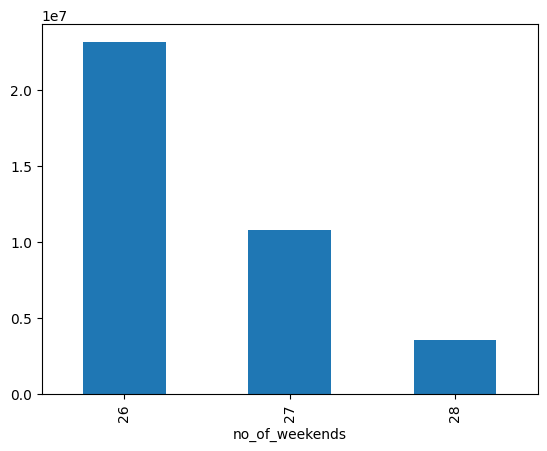

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
24 2013-03-01 2013-06-01    25  64626      3  2013        1    1          4   
24 2013-03-02 2013-06-02    25  64902      3  2013        1    2          5   
24 2013-03-03 2013-06-03    25  64811      3  2013        1    3          6   
24 2013-03-04 2013-06-04    25  64806      3  2013        1    4          0   
24 2013-03-05 2013-06-05    25  65125      3  2013        1    5          1   

    no_of_weekends  
24              27  
24              28  
24              27  
24              26  
24              26  


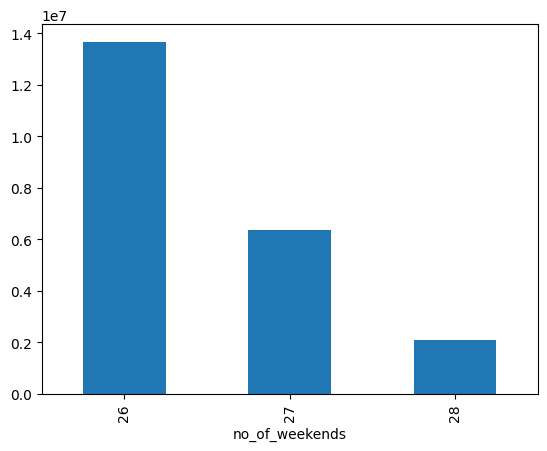

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
25 2013-03-01 2013-06-01    26  37981      3  2013        1    1          4   
25 2013-03-02 2013-06-02    26  38132      3  2013        1    2          5   
25 2013-03-03 2013-06-03    26  38124      3  2013        1    3          6   
25 2013-03-04 2013-06-04    26  38158      3  2013        1    4          0   
25 2013-03-05 2013-06-05    26  38278      3  2013        1    5          1   

    no_of_weekends  
25              27  
25              28  
25              27  
25              26  
25              26  


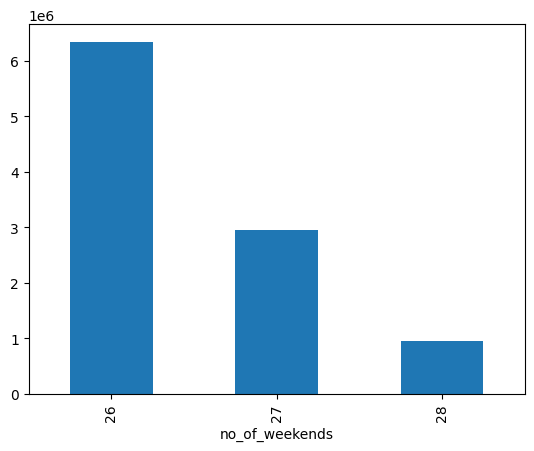

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
26 2013-03-01 2013-06-01    27  17687      3  2013        1    1          4   
26 2013-03-02 2013-06-02    27  17798      3  2013        1    2          5   
26 2013-03-03 2013-06-03    27  17792      3  2013        1    3          6   
26 2013-03-04 2013-06-04    27  17803      3  2013        1    4          0   
26 2013-03-05 2013-06-05    27  17876      3  2013        1    5          1   

    no_of_weekends  
26              27  
26              28  
26              27  
26              26  
26              26  


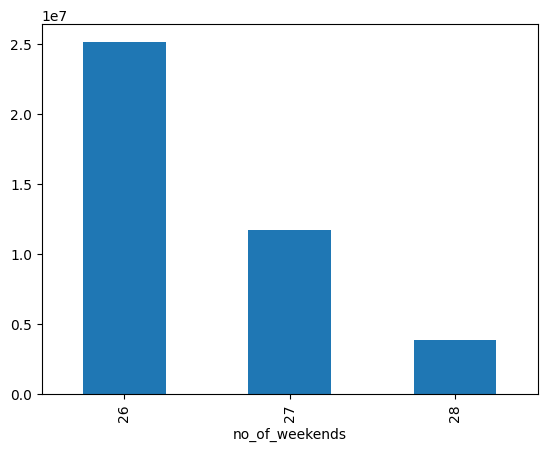

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
27 2013-03-01 2013-06-01    28  70451      3  2013        1    1          4   
27 2013-03-02 2013-06-02    28  70731      3  2013        1    2          5   
27 2013-03-03 2013-06-03    28  70637      3  2013        1    3          6   
27 2013-03-04 2013-06-04    28  70647      3  2013        1    4          0   
27 2013-03-05 2013-06-05    28  70989      3  2013        1    5          1   

    no_of_weekends  
27              27  
27              28  
27              27  
27              26  
27              26  


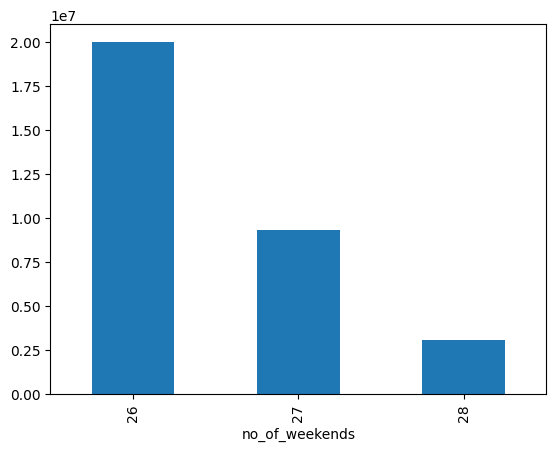

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
28 2013-03-01 2013-06-01    29  55561      3  2013        1    1          4   
28 2013-03-02 2013-06-02    29  55858      3  2013        1    2          5   
28 2013-03-03 2013-06-03    29  55857      3  2013        1    3          6   
28 2013-03-04 2013-06-04    29  55899      3  2013        1    4          0   
28 2013-03-05 2013-06-05    29  56139      3  2013        1    5          1   

    no_of_weekends  
28              27  
28              28  
28              27  
28              26  
28              26  


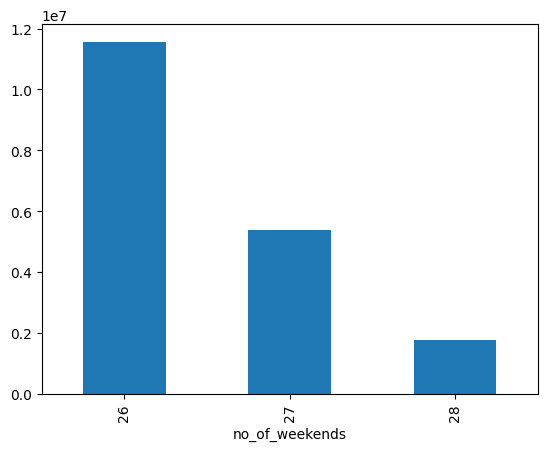

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
29 2013-03-01 2013-06-01    30  32378      3  2013        1    1          4   
29 2013-03-02 2013-06-02    30  32480      3  2013        1    2          5   
29 2013-03-03 2013-06-03    30  32433      3  2013        1    3          6   
29 2013-03-04 2013-06-04    30  32471      3  2013        1    4          0   
29 2013-03-05 2013-06-05    30  32580      3  2013        1    5          1   

    no_of_weekends  
29              27  
29              28  
29              27  
29              26  
29              26  


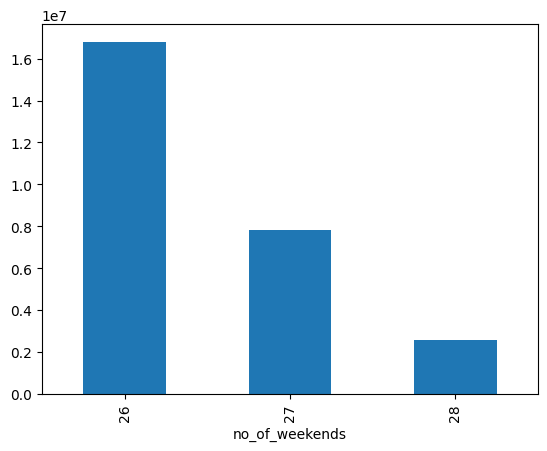

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
30 2013-03-01 2013-06-01    31  47102      3  2013        1    1          4   
30 2013-03-02 2013-06-02    31  47348      3  2013        1    2          5   
30 2013-03-03 2013-06-03    31  47268      3  2013        1    3          6   
30 2013-03-04 2013-06-04    31  47311      3  2013        1    4          0   
30 2013-03-05 2013-06-05    31  47528      3  2013        1    5          1   

    no_of_weekends  
30              27  
30              28  
30              27  
30              26  
30              26  


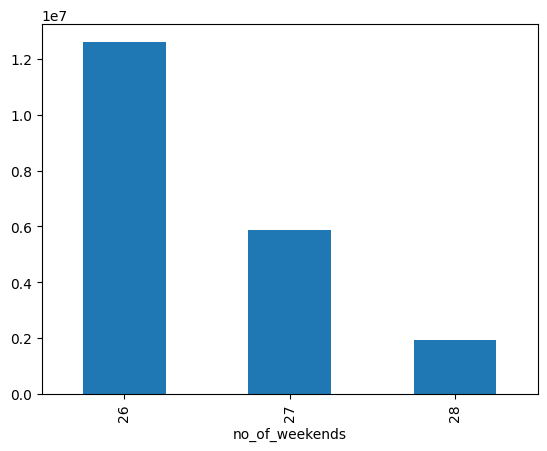

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
31 2013-03-01 2013-06-01    32  35056      3  2013        1    1          4   
31 2013-03-02 2013-06-02    32  35234      3  2013        1    2          5   
31 2013-03-03 2013-06-03    32  35232      3  2013        1    3          6   
31 2013-03-04 2013-06-04    32  35241      3  2013        1    4          0   
31 2013-03-05 2013-06-05    32  35365      3  2013        1    5          1   

    no_of_weekends  
31              27  
31              28  
31              27  
31              26  
31              26  


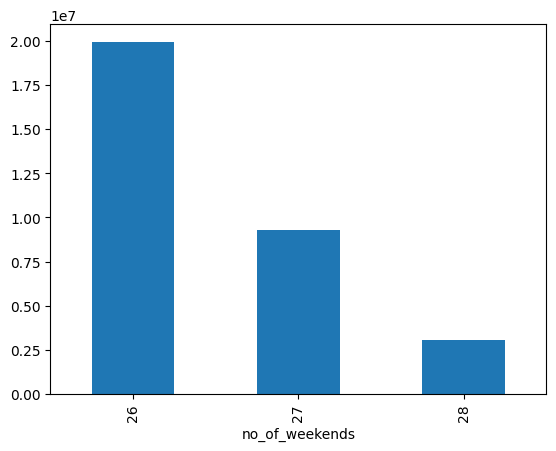

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
32 2013-03-01 2013-06-01    33  55315      3  2013        1    1          4   
32 2013-03-02 2013-06-02    33  55557      3  2013        1    2          5   
32 2013-03-03 2013-06-03    33  55514      3  2013        1    3          6   
32 2013-03-04 2013-06-04    33  55579      3  2013        1    4          0   
32 2013-03-05 2013-06-05    33  55812      3  2013        1    5          1   

    no_of_weekends  
32              27  
32              28  
32              27  
32              26  
32              26  


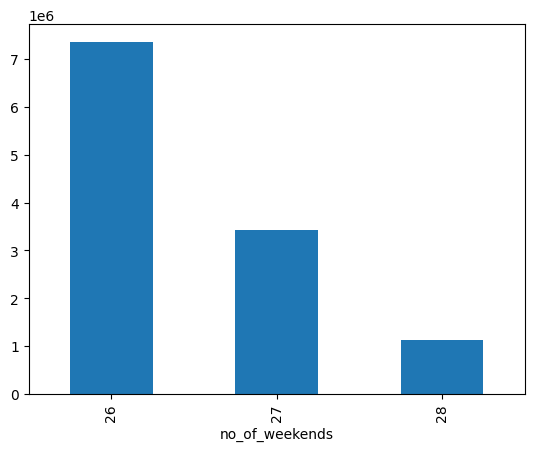

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
33 2013-03-01 2013-06-01    34  20733      3  2013        1    1          4   
33 2013-03-02 2013-06-02    34  20864      3  2013        1    2          5   
33 2013-03-03 2013-06-03    34  20872      3  2013        1    3          6   
33 2013-03-04 2013-06-04    34  20870      3  2013        1    4          0   
33 2013-03-05 2013-06-05    34  20984      3  2013        1    5          1   

    no_of_weekends  
33              27  
33              28  
33              27  
33              26  
33              26  


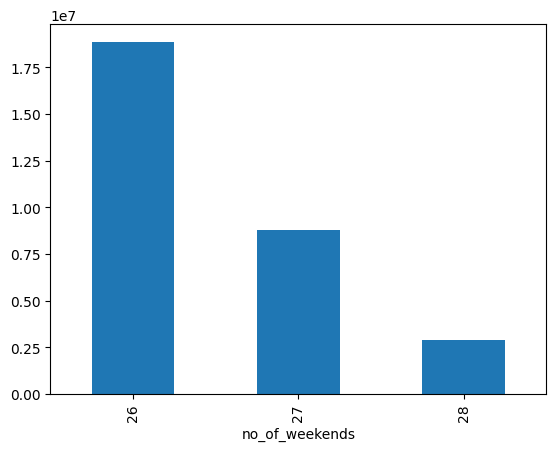

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
34 2013-03-01 2013-06-01    35  52812      3  2013        1    1          4   
34 2013-03-02 2013-06-02    35  53146      3  2013        1    2          5   
34 2013-03-03 2013-06-03    35  53036      3  2013        1    3          6   
34 2013-03-04 2013-06-04    35  53072      3  2013        1    4          0   
34 2013-03-05 2013-06-05    35  53261      3  2013        1    5          1   

    no_of_weekends  
34              27  
34              28  
34              27  
34              26  
34              26  


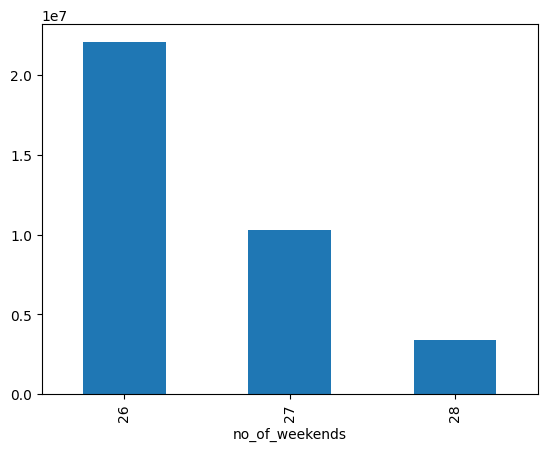

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
35 2013-03-01 2013-06-01    36  61451      3  2013        1    1          4   
35 2013-03-02 2013-06-02    36  61765      3  2013        1    2          5   
35 2013-03-03 2013-06-03    36  61717      3  2013        1    3          6   
35 2013-03-04 2013-06-04    36  61753      3  2013        1    4          0   
35 2013-03-05 2013-06-05    36  61961      3  2013        1    5          1   

    no_of_weekends  
35              27  
35              28  
35              27  
35              26  
35              26  


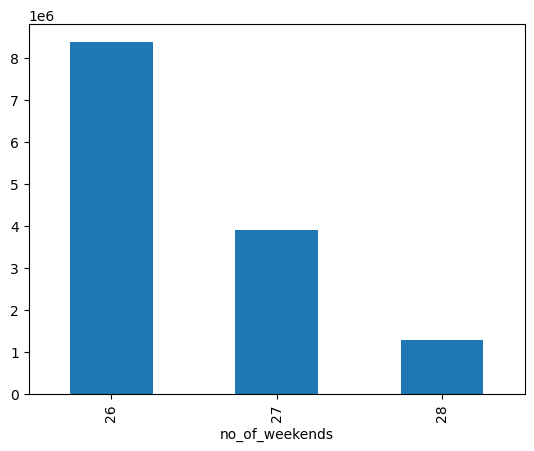

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
36 2013-03-01 2013-06-01    37  23297      3  2013        1    1          4   
36 2013-03-02 2013-06-02    37  23369      3  2013        1    2          5   
36 2013-03-03 2013-06-03    37  23349      3  2013        1    3          6   
36 2013-03-04 2013-06-04    37  23349      3  2013        1    4          0   
36 2013-03-05 2013-06-05    37  23434      3  2013        1    5          1   

    no_of_weekends  
36              27  
36              28  
36              27  
36              26  
36              26  


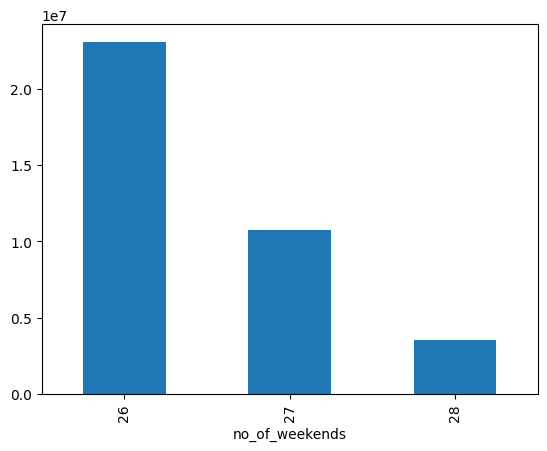

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
37 2013-03-01 2013-06-01    38  64656      3  2013        1    1          4   
37 2013-03-02 2013-06-02    38  64991      3  2013        1    2          5   
37 2013-03-03 2013-06-03    38  64986      3  2013        1    3          6   
37 2013-03-04 2013-06-04    38  65010      3  2013        1    4          0   
37 2013-03-05 2013-06-05    38  65325      3  2013        1    5          1   

    no_of_weekends  
37              27  
37              28  
37              27  
37              26  
37              26  


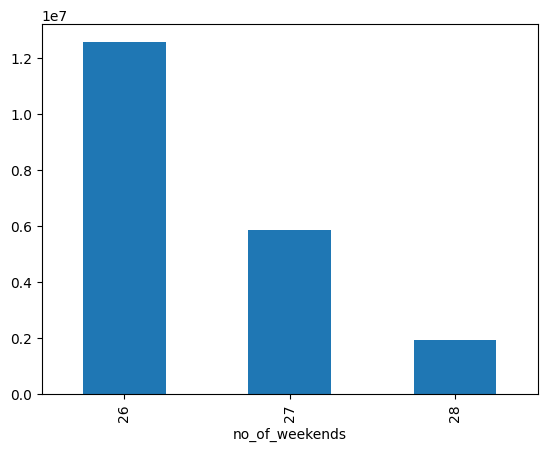

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
38 2013-03-01 2013-06-01    39  35088      3  2013        1    1          4   
38 2013-03-02 2013-06-02    39  35292      3  2013        1    2          5   
38 2013-03-03 2013-06-03    39  35270      3  2013        1    3          6   
38 2013-03-04 2013-06-04    39  35226      3  2013        1    4          0   
38 2013-03-05 2013-06-05    39  35368      3  2013        1    5          1   

    no_of_weekends  
38              27  
38              28  
38              27  
38              26  
38              26  


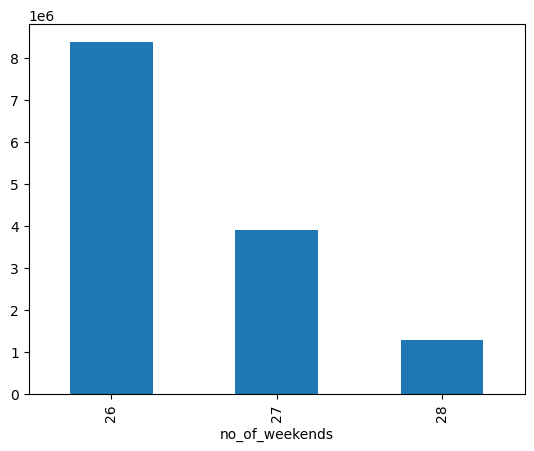

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
39 2013-03-01 2013-06-01    40  23561      3  2013        1    1          4   
39 2013-03-02 2013-06-02    40  23656      3  2013        1    2          5   
39 2013-03-03 2013-06-03    40  23636      3  2013        1    3          6   
39 2013-03-04 2013-06-04    40  23650      3  2013        1    4          0   
39 2013-03-05 2013-06-05    40  23776      3  2013        1    5          1   

    no_of_weekends  
39              27  
39              28  
39              27  
39              26  
39              26  


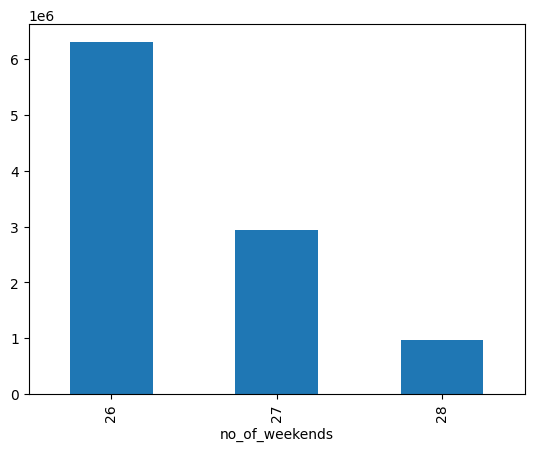

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
40 2013-03-01 2013-06-01    41  17550      3  2013        1    1          4   
40 2013-03-02 2013-06-02    41  17626      3  2013        1    2          5   
40 2013-03-03 2013-06-03    41  17609      3  2013        1    3          6   
40 2013-03-04 2013-06-04    41  17644      3  2013        1    4          0   
40 2013-03-05 2013-06-05    41  17757      3  2013        1    5          1   

    no_of_weekends  
40              27  
40              28  
40              27  
40              26  
40              26  


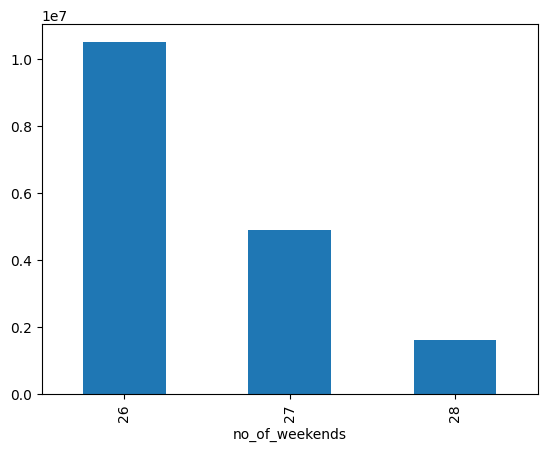

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
41 2013-03-01 2013-06-01    42  29348      3  2013        1    1          4   
41 2013-03-02 2013-06-02    42  29507      3  2013        1    2          5   
41 2013-03-03 2013-06-03    42  29497      3  2013        1    3          6   
41 2013-03-04 2013-06-04    42  29491      3  2013        1    4          0   
41 2013-03-05 2013-06-05    42  29608      3  2013        1    5          1   

    no_of_weekends  
41              27  
41              28  
41              27  
41              26  
41              26  


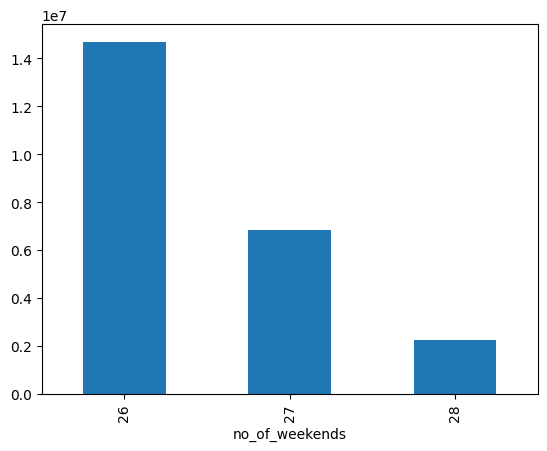

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
42 2013-03-01 2013-06-01    43  40942      3  2013        1    1          4   
42 2013-03-02 2013-06-02    43  41135      3  2013        1    2          5   
42 2013-03-03 2013-06-03    43  41155      3  2013        1    3          6   
42 2013-03-04 2013-06-04    43  41170      3  2013        1    4          0   
42 2013-03-05 2013-06-05    43  41373      3  2013        1    5          1   

    no_of_weekends  
42              27  
42              28  
42              27  
42              26  
42              26  


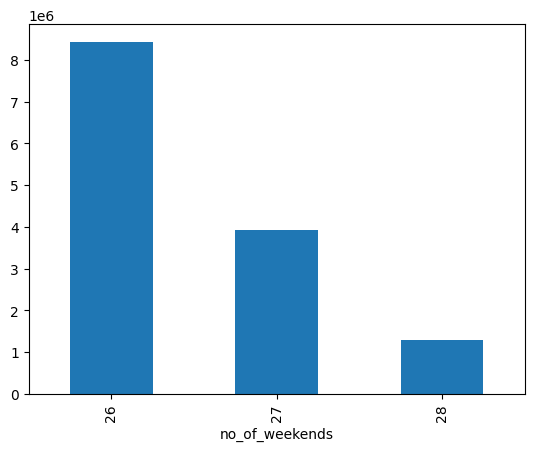

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
43 2013-03-01 2013-06-01    44  23571      3  2013        1    1          4   
43 2013-03-02 2013-06-02    44  23682      3  2013        1    2          5   
43 2013-03-03 2013-06-03    44  23645      3  2013        1    3          6   
43 2013-03-04 2013-06-04    44  23674      3  2013        1    4          0   
43 2013-03-05 2013-06-05    44  23758      3  2013        1    5          1   

    no_of_weekends  
43              27  
43              28  
43              27  
43              26  
43              26  


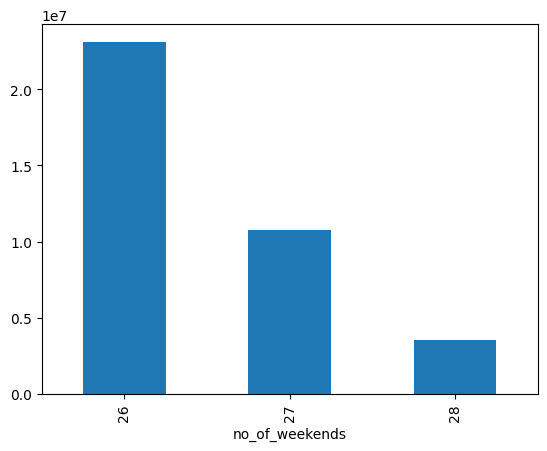

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
44 2013-03-01 2013-06-01    45  64363      3  2013        1    1          4   
44 2013-03-02 2013-06-02    45  64724      3  2013        1    2          5   
44 2013-03-03 2013-06-03    45  64739      3  2013        1    3          6   
44 2013-03-04 2013-06-04    45  64746      3  2013        1    4          0   
44 2013-03-05 2013-06-05    45  64990      3  2013        1    5          1   

    no_of_weekends  
44              27  
44              28  
44              27  
44              26  
44              26  


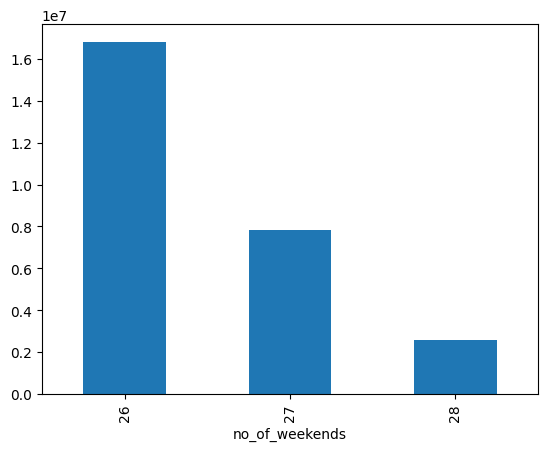

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
45 2013-03-01 2013-06-01    46  47362      3  2013        1    1          4   
45 2013-03-02 2013-06-02    46  47570      3  2013        1    2          5   
45 2013-03-03 2013-06-03    46  47491      3  2013        1    3          6   
45 2013-03-04 2013-06-04    46  47535      3  2013        1    4          0   
45 2013-03-05 2013-06-05    46  47699      3  2013        1    5          1   

    no_of_weekends  
45              27  
45              28  
45              27  
45              26  
45              26  


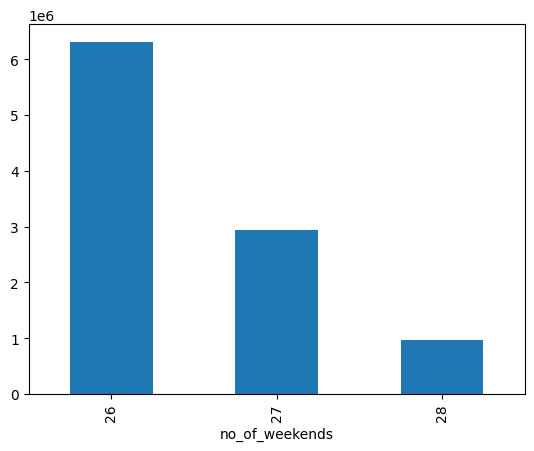

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
46 2013-03-01 2013-06-01    47  17569      3  2013        1    1          4   
46 2013-03-02 2013-06-02    47  17661      3  2013        1    2          5   
46 2013-03-03 2013-06-03    47  17643      3  2013        1    3          6   
46 2013-03-04 2013-06-04    47  17642      3  2013        1    4          0   
46 2013-03-05 2013-06-05    47  17723      3  2013        1    5          1   

    no_of_weekends  
46              27  
46              28  
46              27  
46              26  
46              26  


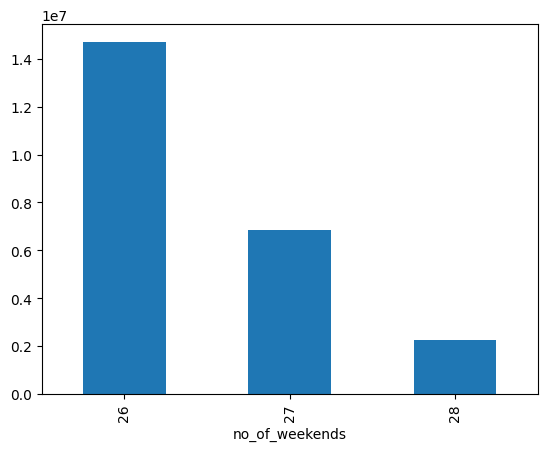

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
47 2013-03-01 2013-06-01    48  41165      3  2013        1    1          4   
47 2013-03-02 2013-06-02    48  41362      3  2013        1    2          5   
47 2013-03-03 2013-06-03    48  41304      3  2013        1    3          6   
47 2013-03-04 2013-06-04    48  41316      3  2013        1    4          0   
47 2013-03-05 2013-06-05    48  41502      3  2013        1    5          1   

    no_of_weekends  
47              27  
47              28  
47              27  
47              26  
47              26  


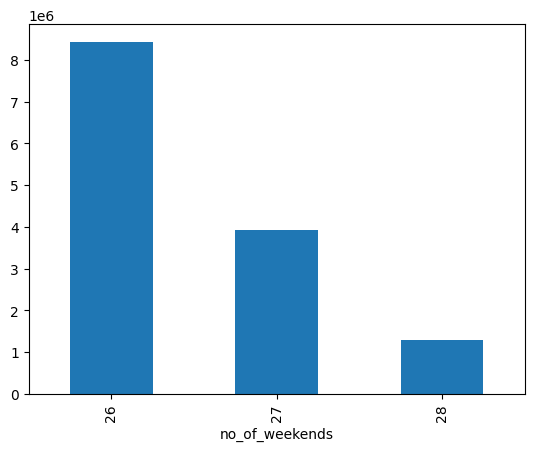

   start_date   end_date  item  sales  month  year  quarter  day  dayofweek  \
48 2013-03-01 2013-06-01    49  23420      3  2013        1    1          4   
48 2013-03-02 2013-06-02    49  23547      3  2013        1    2          5   
48 2013-03-03 2013-06-03    49  23526      3  2013        1    3          6   
48 2013-03-04 2013-06-04    49  23568      3  2013        1    4          0   
48 2013-03-05 2013-06-05    49  23673      3  2013        1    5          1   

    no_of_weekends  
48              27  
48              28  
48              27  
48              26  
48              26  


In [45]:
for i in range(1,50):
    df_ml1 = df_ml[df_ml['item'] == i]
    (df_ml1.groupby("no_of_weekends")["sales"].sum()).plot(kind='bar')
    plt.show()
    print(df_ml1.head())
#df_ml1.plot(x ='sales', y = 'no_of_weekends',style = '*',figsize = (15,5))

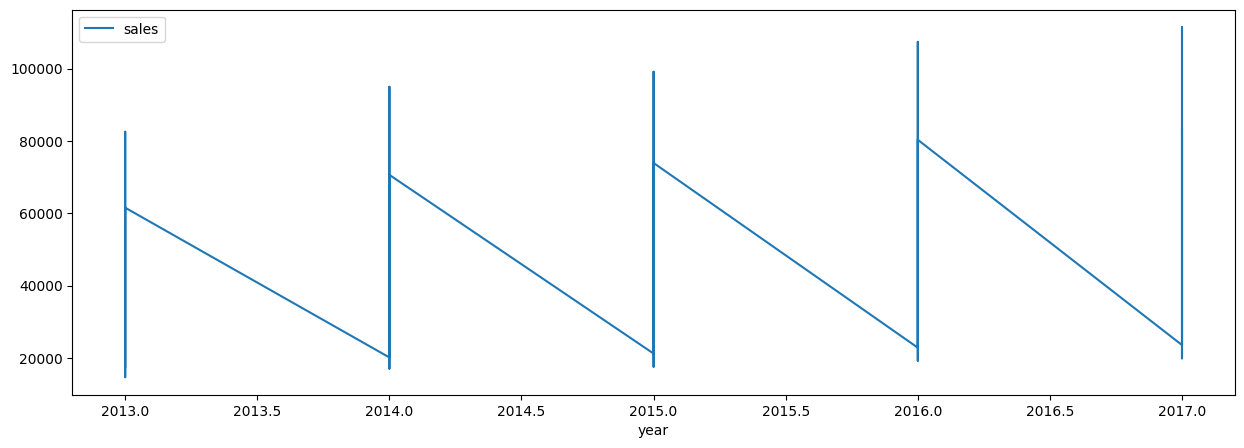

In [46]:
# Distribution of feature 
df_ml.plot(x = 'year', y = 'sales',style = '-',figsize = (15,5))
plt.show()

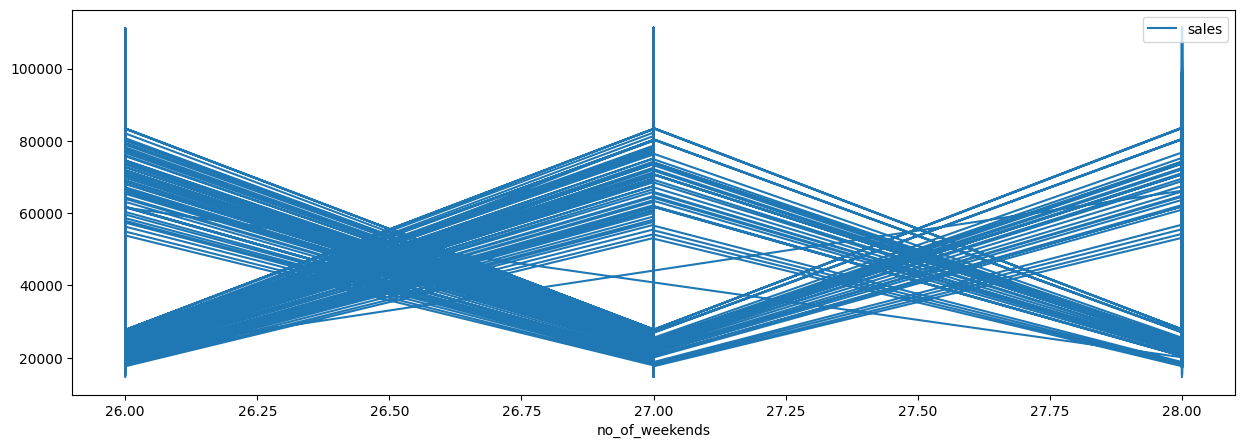

In [47]:
df_ml.plot(x = 'no_of_weekends', y = 'sales',style = '-',figsize = (15,5))
plt.show()

In [48]:
import matplotlib.pyplot as plt
grouped = df_ml[(df_ml['item'] < 10) & (df_ml['start_date'] < '2013-12-31')].groupby(['start_date', 'item']).sum()
pivot_table = grouped.unstack(level=1)
pivot_table.plot(kind='bar', stacked=True)
plt.title('Sales by Date and Item')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

C:\Users\pjpra\AppData\Local\Temp\ipykernel_8360\3053993891.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_ml[(df_ml['item'] < 10) & (df_ml['start_date'] < '2013-12-31')].groupby(['start_date', 'item']).sum()


KeyboardInterrupt: 

<AxesSubplot: xlabel='no_of_weekends,item'>

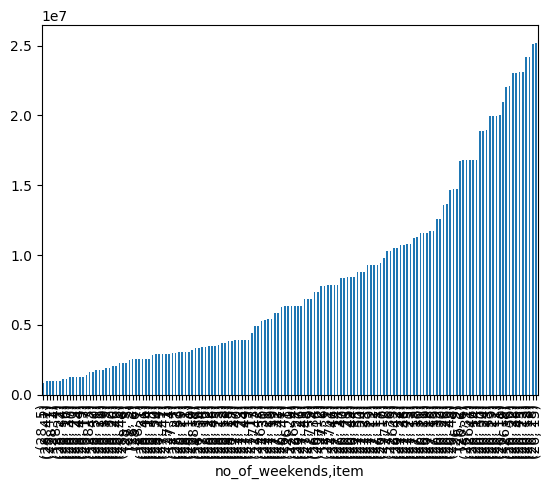

In [49]:
(df_ml.groupby(["no_of_weekends","item"])["sales"].sum()).sort_values().plot(kind='bar')
#(df_ml.groupby(["item"])["sales"].sum()).sort_values().plot(kind='bar')

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

def split_fn(itm):
    df_ml_item = df_ml[df_ml['item'] == itm]

    # Splitting test/train data
    train = df_ml_item.loc[(df_ml_item.year > 2013) & (df_ml_item.year < 2017)]
    test = df_ml_item.loc[(df_ml_item.year == 2017)]

    # Train Test split
    x_train = train[['month', 'year', 'quarter',
           'day', 'dayofweek', 'no_of_weekends']].values
    y_train = train['sales'].values
    x_test = test[['month', 'year', 'quarter',
           'day', 'dayofweek', 'no_of_weekends']].values
    y_test = test['sales'].values

    #x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

    # Scaling the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # KNN
    knn = KNeighborsRegressor(1)
    knn.fit(x_train,y_train)
    knn.score(x_test,y_test)

In [53]:
from sklearn.tree import DecisionTreeRegressor

itm = 8
df_ml_item = df_ml[df_ml['item'] == itm]
    
# Splitting test/train data
train = df_ml_item.loc[(df_ml_item.year > 2013) & (df_ml_item.year < 2017)]
test = df_ml_item.loc[(df_ml_item.year == 2017)]
    
# Train Test split
x_train = train[['item', 'sales', 'month', 'year', 'quarter',
       'day', 'dayofweek', 'no_of_weekends']].values
y_train = train['sales'].values
x_test = test[['item', 'sales', 'month', 'year', 'quarter',
       'day', 'dayofweek', 'no_of_weekends']].values
y_test = test['sales'].values

# Instantiate dt
dtr = DecisionTreeRegressor()

# Fit dt to the training set
dtr.fit(x_train, y_train)
dtr.predict(x_test)

# Predict test set labels
y_pred = dtr.predict(x_test)
y_pred
valAccuracy = cross_val_score(dtr, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
print("Depth  : ", depth, " Cross val score : " ,np.mean(valAccuracy))

NameError: name 'depth' is not defined

In [54]:
df_ml.columns

Index(['start_date', 'end_date', 'item', 'sales', 'month', 'year', 'quarter',
       'day', 'dayofweek', 'no_of_weekends'],
      dtype='object')

In [55]:
itm = 8
df_ml_item = df_ml[df_ml['item'] == itm]
    
# Splitting test/train data
train = df_ml_item.loc[(df_ml_item.year > 2013) & (df_ml_item.year < 2017)]
test = df_ml_item.loc[(df_ml_item.year == 2017)]
    
# Train Test split
x_train = train[['item', 'sales', 'month', 'year', 'quarter',
       'day', 'dayofweek', 'no_of_weekends']].values
y_train = train['sales'].values
x_test = test[['item', 'sales', 'month', 'year', 'quarter',
       'day', 'dayofweek', 'no_of_weekends']].values
y_test = test['sales'].values
    
#x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# KNN
for i in [1,2,3,4,5,6,7,8,9,10]:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train,y_train)
    knn.score(x_test,y_test)
    print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))

K value  :  1  train score :  1.0  cv score :  -21.1150769248074
K value  :  2  train score :  0.9968395806238044  cv score :  -20.800462982617628
K value  :  3  train score :  0.9962866951893142  cv score :  -20.98468502179312
K value  :  4  train score :  0.9943365286014075  cv score :  -24.652526993012778
K value  :  5  train score :  0.9934161240771963  cv score :  -26.465818784268897
K value  :  6  train score :  0.9913346673922906  cv score :  -26.673137939667868
K value  :  7  train score :  0.990432966374195  cv score :  -27.818235165986277
K value  :  8  train score :  0.9875870122052127  cv score :  -29.223701748120675
K value  :  9  train score :  0.9853640840699167  cv score :  -31.838089150533374
K value  :  10  train score :  0.9813754494773327  cv score :  -34.304559100334735


In [ ]:
df_ml[(df_ml['item'] == 3) & (df_ml['year'] == 2017)].count()
train[train.item == 1]

### DecisionTree

In [56]:
# Importing package

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

# item Selection
itm = 10

df_ml_item = df_ml[df_ml['item'] == itm]
#df_ml_item = df_ml

# Splitting test/train data
train = df_ml_item.loc[df_ml_item.year < 2017]
test = df_ml_item.loc[df_ml_item.year == 2017]

# Train Test split
x_train = train[['month', 'year', 'dayofweek']].values
y_train = train['sales'].values
x_test = test[['month', 'year','dayofweek']].values
y_test = test['sales'].values


from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dtr = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  
  # Fit dt to the training set
  dtr.fit(x_train, y_train) # the model is trained
  
  # Predict test set labels
  y_pred = dtr.predict(x_test)
  y_pred
  valAccuracy = cross_val_score(dtr, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Cross val score : " ,np.mean(valAccuracy))
  #acc = accuracy_score(y_test, y_pred)
  #print("Test set accuracy: {:.2f}".format(acc))
  #acc = roc_auc_score(y_test, y_pred,multi_class = 'ovr')

Depth  :  1  Cross val score :  -60.51695852839689
Depth  :  2  Cross val score :  -39.60252875500877
Depth  :  3  Cross val score :  -21.952097352609552
Depth  :  4  Cross val score :  -8.798197037381666
Depth  :  5  Cross val score :  -6.9445273380868375
Depth  :  6  Cross val score :  -6.958542028069081
Depth  :  7  Cross val score :  -6.9498880800958505
Depth  :  8  Cross val score :  -6.9686070268352625
Depth  :  9  Cross val score :  -6.968382697157518
Depth  :  10  Cross val score :  -6.968382697157518
Depth  :  20  Cross val score :  -6.968382697157518


In [57]:
# Train Test split
x_train = train[['month', 'year', 'dayofweek']].values
y_train = train['sales'].values
x_test = test[['month', 'year','dayofweek']].values
y_test = test['sales'].values

from matplotlib import pyplot
dtr = DecisionTreeRegressor(max_depth = 3)
#Fit dt to the training set
dtr.fit(x_train, y_train)
importance = dtr.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,x_test.columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
test['year'].unique()
y_train
y_test
#train

In [ ]:
split_fn(1)

In [ ]:
print(*train.start_date.dt.to_period('Y').unique(),
      *test.start_date.dt.to_period('y').unique())

test.start_date.unique
train.year.tail()
test.year.tail()

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, x = 'year', y='sales', label='Trainin Data')
test.plot(ax=ax,x = 'year',y = 'sales', label = 'Test Data')
ax.axvline(2017, color = 'black', ls = '--')
ax.legend(['Training Data', 'Test Data'])
plt.ylabel('Sales')
plt.show()

,start_date,end_date,item,sales,month,year,quarter,day,dayofweek,no_of_weekends
0,2013-03-01,2013-06-01,1,17534,3,2013,1,1,4,27
1,2013-03-01,2013-06-01,2,46695,3,2013,1,1,4,27
2,2013-03-01,2013-06-01,3,29408,3,2013,1,1,4,27
3,2013-03-01,2013-06-01,4,17775,3,2013,1,1,4,27
4,2013-03-01,2013-06-01,5,14639,3,2013,1,1,4,27
...,...,...,...,...,...,...,...,...,...,...
45,2017-05-29,2017-08-29,46,73686,5,2017,2,29,0,26
46,2017-05-29,2017-08-29,47,27981,5,2017,2,29,0,26
47,2017-05-29,2017-08-29,48,64320,5,2017,2,29,0,26
48,2017-05-29,2017-08-29,49,36979,5,2017,2,29,0,26


### Random Forest

In [105]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# item Selection
# itm = 11
# df_ml_item = df_ml[df_ml['item'] == itm]

df_ml_item = df_ml

# Splitting test/train data
train = df_ml_item.loc[df_ml_item.year < 2017]
test = df_ml_item.loc[df_ml_item.year == 2017]

# Train Test split
x_train = train[['month','year','quarter','sales','day','dayofweek']].values
y_train = train['sales'].values
x_test = test[['month','year','quarter','sales','day','dayofweek']].values
y_test = test['sales'].values

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')

# Train the model on training data
rf.fit(x_train , y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
errors

r2_score(predictions, y_test)

0.220345040155022

In [88]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(x_train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances] 

Variable: [    3  2013     4 17775] Importance: 0.946
Variable: [    3  2013     4 46695] Importance: 0.046
Variable: [    3  2013     4 17534] Importance: 0.008
Variable: [    3  2013     4 29408] Importance: 0.0


[None, None, None, None]

NameError: name 'log' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_ml[['start_date','item']].values
y = df_ml['sales'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
x_train

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)


#knn = KNeighborsClassifier(3)
#knn.fit(x_train,y_train)
#knn.score(x_test,y_test)

In [ ]:
# Reference
#df_filtered.groupby(pd.Grouper(key = 'date',freq='Y')).sum()
# Distribution of feature 
# Feature relation